In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100 # кол-во покупателей
x1 = 0 # ограничение пляжа слево
x2 = 1 # ограничение пляжа слево
p = p1 = p2 = 1 # цена продажи мороженого у торговцев
c = c1 = c2 = 0 # цена производства
tau = 0.5 # коэффициент расстояния для покупателей
delta = 0.01 # коэффициент расстояния для торговцев
v = 3 # максимальная цена, которую готов оплатить покупатель
T = 1000 # кол-во шагов по времени

In [3]:
# Класс торговца
class Seller:
  counter = 0
  def __init__(self, j):
    self.n = Seller.counter
    Seller.counter += 1
    self.x = j - 1 # можно датчик случайных чисел
    self.p = p # цена продажи мороженого у торговца
    self.c = c # издержки
    self.q = 0 # счётчик покупателей

  def calc_profit(self):
    self.pi = (self.p - self.c) * self.q

  def start_period(self):
    self.q = 0
    self.pi = 0

  def move(self, other, pos_x):
    if self.pi <= other.pi:
      self.x = self.x - delta * np.sign(self.x - pos_x)

# Класс покупателя
class Customer:
  def __init__(self, i):
    self.x = np.random.uniform()
    self.v = v
    self.tau = tau

  def choose(self, seller_list):
    u1 = self.v - seller_list[0].p - self.tau * abs(self.x - seller_list[0].x)
    u2 = self.v - seller_list[1].p - self.tau * abs(self.x - seller_list[1].x)
    u3 = 0
    if u1 >= u2 and u1 >= u3:
      seller_list[0].q = seller_list[0].q + 1
    if u2 >= u1 and u2 >= u3:
      seller_list[1].q = seller_list[1].q + 1

In [4]:
seller_list = [Seller(j) for j in range(1,3)]
customers_list = [Customer(i) for i in range(1, m + 1)]

In [5]:
x1 = []
x2 = []
for t in range(T):
  for s in seller_list:
    s.start_period()
  for cus in customers_list:
    cus.choose(seller_list)
  for s in seller_list:
    s.calc_profit()
  pos_1 = seller_list[0].x
  pos_2 = seller_list[1].x
  x1.append(pos_1)
  x2.append(pos_2)
  seller_list[0].move(seller_list[0], pos_2)
  seller_list[1].move(seller_list[1], pos_1)
  # проверка работоспособности скрипта
  #for s in seller_list:
  #  print("name: ", s.n, "; profit: ", s.pi, "; coord: ", s.x)

Text(0.5, 1.0, 'Movement')

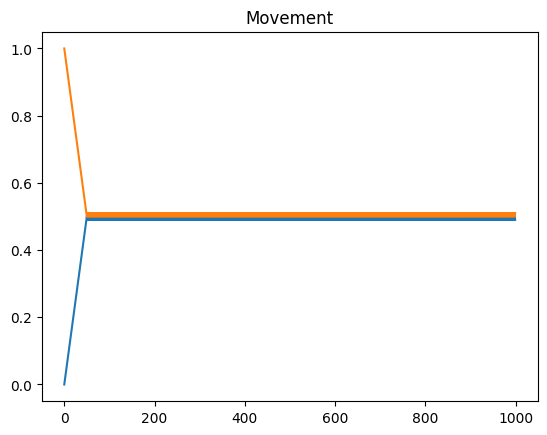

In [6]:
# Вывод результатов
plt.plot(x1)
plt.plot(x2)
plt.title("Movement")